# Predicting House Sale Prices

In this project, I want to build a linear regression model that can predict house sale prices based on some numerical features. I also want to explore ways to improve the model. 

I'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010.



## Regression Function

Let's write the regression model that will be used at every step to see if the cleaning phase and feature selection give the chance to have better results.

It will be employed the `scikit-learn` library to use a `LinearRegression()` model and a `KFold()` instance to give more robust result. 

In [0]:
# Import libraries
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error

# Options to set
pd.set_option('display.max_columns', 900)
pd.set_option('display.max_rows', 100)
np.random.seed(1)

In [0]:
def test_model(df, features, target):
  # Check if features is a list to have a dataframe and not a series
  if type(features) != list:
    features = [features]

  lr = LinearRegression()
  kf = KFold(n_splits=10, shuffle=True)
  rmse = abs(np.mean(cross_val_score(estimator=lr, 
                                  X=df[features], 
                                  y=df[target], 
                                  scoring="neg_root_mean_squared_error",
                                  cv=kf)))
  return rmse

# Exploring the Data

You can read more about the data [here](https://doi.org/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Here's a preview of the data set:

In [246]:
# Load the data
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [247]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

Most of the columns are `string` type, the others are `float` and `integer`.

In [248]:
# Percentage of missing values for every column
cols_perc_null = 100*(df.isnull().sum().sort_values()) / df.shape[0]

cols_perc_null

Order               0.000000
Sale Condition      0.000000
Heating QC          0.000000
Central Air         0.000000
1st Flr SF          0.000000
2nd Flr SF          0.000000
Low Qual Fin SF     0.000000
Gr Liv Area         0.000000
Full Bath           0.000000
Half Bath           0.000000
Bedroom AbvGr       0.000000
Kitchen AbvGr       0.000000
Kitchen Qual        0.000000
Foundation          0.000000
TotRms AbvGrd       0.000000
Fireplaces          0.000000
Paved Drive         0.000000
Wood Deck SF        0.000000
Open Porch SF       0.000000
Enclosed Porch      0.000000
3Ssn Porch          0.000000
Screen Porch        0.000000
Pool Area           0.000000
Misc Val            0.000000
Mo Sold             0.000000
Yr Sold             0.000000
Sale Type           0.000000
Functional          0.000000
Exter Cond          0.000000
Heating             0.000000
Condition 1         0.000000
House Style         0.000000
Bldg Type           0.000000
Condition 2         0.000000
Exter Qual    

Most of the columns have under 6% of missing values.

## Target Feature

Let's explore the target feature `SalePrice` to better understand it.

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

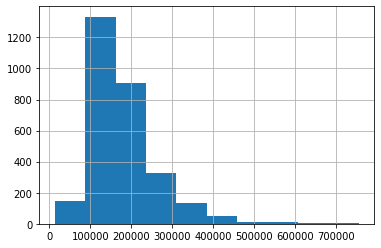

In [249]:
df["SalePrice"].hist()
df["SalePrice"].describe()

So, usually prices range from 100,000\$ to 250,000\$.

## First Test

Let's test the model with all the numeric columns with 0 missing values to predict values in `SalePrice` column.

In [250]:
# select cols with 0 missing values
cols_zero_null = cols_perc_null[cols_perc_null == 0].index

# select only the numerical features
numeric_features = df[cols_zero_null].select_dtypes(include=['integer', 'float']).columns.copy()

# Remove columns that are not useful for ML or that leak info about the final sale
numeric_features = numeric_features.drop(["PID", "Order", "Mo Sold", "Yr Sold", "Year Built", "Year Remod/Add", "SalePrice"]).tolist()

# Apply the model
rmse_result = test_model(df=df, features=numeric_features, target="SalePrice")

print("RMSE: {:,} $".format(round(rmse_result,2)))

RMSE: 37,024.77 $


# Data Cleaning

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. I also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). 

In general, the goal is to:

- Remove features that I don't want to use in the model, just based on the number of missing values or data leakage;
- Transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc.);
- Create new features by combining other features.

## Manage Missing Values

Let's remove all the columns that have 5% or more of missing values.



In [0]:
# select cols with less than 5% of missing values
cols_5_null = cols_perc_null[cols_perc_null < 5].index

For numerical columns fill missing values with the most common value, the mode.

In [0]:
# select only the numerical features
numeric_features = df[cols_5_null].select_dtypes(include=['integer', 'float']).columns.copy()

# fill missing values
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mode().iloc[0])

## Create New Features

Let's create new features by combining other features that better capture the information in some of them.

In [0]:
# create new columns
df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']

# remove the rows that have negative values for these new columns
df.drop(df[(df['Years Before Sale'] < 0) | (df['Years Since Remod'] < 0)].index, inplace=True)

# remove no longer needed columns
df.drop(['Yr Sold', 'Year Built', 'Year Remod/Add'], axis=1, inplace=True)

## Second Test

Let's test again the model after this cleaning phase.

In [254]:
# Add the 2 new created columns
numeric_features = numeric_features.union(['Years Before Sale', 'Years Since Remod'])

# Remove columns that are not useful for ML or that leak info about the final sale
numeric_features = numeric_features.drop(["PID", "Order", "Mo Sold", "Yr Sold", "Year Built", "Year Remod/Add", "SalePrice"]).tolist()

# Apply the model
rmse_result_2 = test_model(df=df, features=numeric_features, target="SalePrice")

print("RMSE: {:,.2f} $".format(rmse_result_2))
print("Improvement from before of {:.2f}%".format(100*(rmse_result-rmse_result_2)/rmse_result))

RMSE: 31,365.78 $
Improvement from before of 15.28%


There was an interesting improvement of about 16% on the RMSE value after this cleaning phase.

# Feature Selection

Now that I have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

# Correlation of Numerical Features

Let's generate a correlation heatmap matrix of the numerical features and keep only the columns with a correlation coefficient larger than 0.40.

In [255]:
# Generate the correlation matrix for SalePrice column
corr_coef_abs = df.corr().loc[numeric_features,"SalePrice"].abs()

# Keep only the columns with a value larger than 0.40
numeric_features = corr_coef_abs[corr_coef_abs > .4].index.tolist()

corr_coef_abs[corr_coef_abs > .4].sort_values(ascending=False)

Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Name: SalePrice, dtype: float64

## Which Categorical Column to Keep

Now I'm going to answer these questions:

- Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the dataframe, so it will be better to elimate them.

In [256]:
# List of column names from documentation that are meant to be categorical
nominal_features = ["MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

# How many unique values in each categorical column?
uniqueness_counts = df[nominal_features].apply(lambda x: len(x.unique()))
# Aribtrary cutoff of 10 unique values
cutoff = 10
cols_nonunique = uniqueness_counts[uniqueness_counts > cutoff].index.tolist()

uniqueness_counts[uniqueness_counts > cutoff]

MS SubClass     16
Neighborhood    28
Exterior 1st    16
Exterior 2nd    17
dtype: int64

In [0]:
# Select just the remaining text columns and convert to categorical
text_cols = df[cols_nonunique].select_dtypes(include=['object']).columns.tolist()
for col in text_cols:
    df[col] = df[col].astype('category')
    
# Create dummy dataframe
dummy_df = pd.get_dummies(df[text_cols])
# Save dummy columns
dummy_features = dummy_df.columns.tolist()
# Add back to the original dataframe
df = pd.concat([df, dummy_df], axis=1).drop(text_cols, axis=1)

## Third Test

Let's test again the model after this feature selection phase.

In [258]:
# Add dummy features with numeric features
final_features = numeric_features + dummy_features

# Apply the model
rmse_result_3 = test_model(df=df, features=final_features, target="SalePrice")

print("RMSE: {:,.2f} $".format(rmse_result_3))
print("Improvement from before of {:.2f}%".format(100*(rmse_result_2-rmse_result_3)/rmse_result_2))
print("Improvement from the first test of {:.2f}%".format(100*(rmse_result-rmse_result_3)/rmse_result))

RMSE: 30,823.53 $
Improvement from before of 1.73%
Improvement from the first test of 16.75%


There was another improvement of about 2% on the RMSE value after this feature selection phase.

# Conclusion

In this project, I build a linear regressor to predict the house prices. The whole data preprocessing phase improved the RMSE score of the last model about 17% from the first one.

The final RMSE value of 30,823\$ is a really good result compared to the range of values of `SalePrice` column.